### MultiPose MoveNet Tutorial

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: tf.config.experimental.set_memory_growth(gpu, True)

1. Load Model

In [8]:
model = hub.load('https://tfhub.dev/google/movenet/multipose/lightning/1')
movenet = model.signatures['serving_default']

2. Make Detections

In [22]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Resize image
    img = frame.copy()
    img = tf.image.resize_with_pad(tf.expand_dims(img, axis=0), 256, 256)
    input_img = tf.cast(img, dtype=tf.int32)

    # Detection section
    results = movenet(input_img)
    keypoints_with_scores = results['output_0'].numpy()[:,:,:51].reshape((6,17,3))
    print(keypoints_with_scores)

    cv2.imshow('Movenet Multipose', frame)

    if cv2.waitKey(10) & 0xFF==ord('q'): break
cap.release()
cv2.destroyAllWindows()

[[[2.33635291e-01 9.11387280e-02 2.16960311e-02]
  [2.36010209e-01 7.21134990e-02 1.02705481e-02]
  [2.44898424e-01 1.14128515e-01 1.86888706e-02]
  [2.39710867e-01 4.73201200e-02 8.94171000e-03]
  [2.47861996e-01 1.19325317e-01 2.97140069e-02]
  [2.44806930e-01 3.74571905e-02 1.42222652e-02]
  [2.55535036e-01 1.27916694e-01 1.74100474e-02]
  [2.22113445e-01 5.51935248e-02 5.28268795e-03]
  [2.00056538e-01 1.22061789e-01 2.92280153e-03]
  [2.53916949e-01 8.53805691e-02 9.28810611e-03]
  [1.08767539e-01 8.31120908e-02 5.84154017e-03]
  [5.07124901e-01 3.19076292e-02 2.36632265e-02]
  [4.79676455e-01 6.18787184e-02 3.79581824e-02]
  [6.56266630e-01 6.46966249e-02 1.03418659e-02]
  [6.12973869e-01 4.33671661e-02 1.44480467e-02]
  [7.89530814e-01 5.45890629e-02 6.16822345e-03]
  [7.70498097e-01 7.73419216e-02 1.85021665e-02]]

 [[2.08093375e-01 5.53185284e-01 2.36935932e-02]
  [1.90150261e-01 5.33946931e-01 1.33091593e-02]
  [1.74074873e-01 5.63488364e-01 1.77492537e-02]
  [1.97296754e-01 

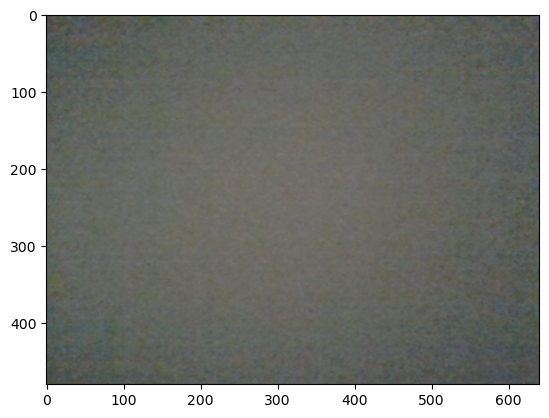

In [19]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

3. Draw Keypoints

In [23]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))

    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1)

4. Draw Edges